<a href="https://colab.research.google.com/github/lauramenicacci/MLProject_KenyaFinancial/blob/main/RandomForestFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLProject_KenyaFinancial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLProject_KenyaFinancial


In [ ]:
#Set X and Y paths
x_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/XoheImp.csv" 
y_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/Y.csv"

In [ ]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Random Forest (50 trees)

In [ ]:
forest50 = RandomForestClassifier(n_estimators = 50)
forest50.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred_val50 = forest50.predict(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_val50))
print("F1:",metrics.f1_score(y_val, y_pred_val50, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, y_pred_val50))


Accuracy: 0.9851953411719085
F1: 0.9849151539974166
Matthew's Correlation Coefficient: 0.9353280613316411


NameError: ignored

Random Forest (100 trees)

In [ ]:
forest100 = RandomForestClassifier(n_estimators = 100) 
forest100.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

In [ ]:
y_pred_val100 = forest100.predict(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_val100))
print("F1:",metrics.f1_score(y_val, y_pred_val100, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, y_pred_val100))

Accuracy: 0.9852438129267246
F1: 0.9849617541345709
Matthew's Correlation Coefficient: 0.9355360606936755


Scores tabulation


In [ ]:
Scores = {}
Scores[50] = {"Accuracy" : 0.985181492099104, "F1" : 0.9848746348842544, "MCC" : 0.9352177479090404}

In [ ]:
Scores[100] = {"Accuracy": 0.9852438129267246, "F1": 0.9849617541345709, "MCC": 0.9355360606936755}

In [ ]:
Scores

{50: {'Accuracy': 0.985181492099104,
  'F1': 0.9848746348842544,
  'MCC': 0.9352177479090404},
 100: {'Accuracy': 0.9852438129267246,
  'F1': 0.9849617541345709,
  'MCC': 0.9355360606936755}}

In [ ]:
ScoresDF = pd.DataFrame([[50, 0.985181492099104, 0.9848746348842544, 0.9352177479090404],[100, 0.9852438129267246, 0.9849617541345709, 0.9355360606936755]], columns = ["Trees", "Accuracy", "F1", "MCC"])

In [ ]:
ScoresDF.to_csv("treeScores.csv", sep=";")

In [ ]:
ScoresDF

,Trees,Accuracy,F1,MCC
0,50,0.985181,0.984875,0.935218
1,100,0.985244,0.984962,0.935536


In [ ]:
tenTree = clf

In [ ]:
fiveTree = clf

In [ ]:
import matplotlib.pyplot as plt

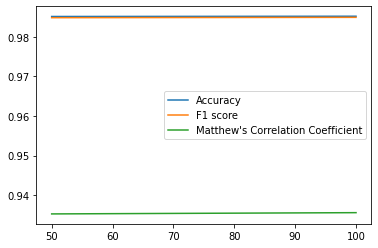

In [ ]:
plt.plot(ScoresDF.Trees, ScoresDF.Accuracy, label = "Accuracy")
plt.plot(ScoresDF.Trees, ScoresDF.F1, label = "F1 score")
plt.plot(ScoresDF.Trees, ScoresDF.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()